In [2]:
from biotite.sequence.phylo import neighbor_joining
import numpy as np
from ete3 import Tree

In [ ]:
distances = np.array([
    [0, 5.3, 4.6, 7.1, 6.1],
    [5.3, 0, 7.3, 10.3, 9.2],
    [4.6, 7.3, 0, 7.5, 6.2],
    [7.1, 10.3, 7.5, 0, 5.8],
    [6.1, 9.2, 6.2,5.8,0.0]
]) #Primero se define una matriz de distancias
tree = neighbor_joining(distances) #Se aplica el método NJ para realizar el arbol y se guarda
graph=tree.to_newick(include_distance=False) #Se obtiene un grafo
t=Tree(str(graph),format=1) #Se forma el árbol a partir de un grafo
print(t)

In [ ]:
graph #Son de la forma (nodo1,nodo2,nodo3...)

In [ ]:
t1 = Tree("(A,(B,(E,D)));" )
t2 = Tree('(A,(H,F),(B,(E,D)));')
print(t1)
print(t2)

In [ ]:
#Solo se puede comparar con rfd para root trees, asi que le damos un root al tree
root_point = t2.get_midpoint_outgroup()
t2.set_outgroup(root_point)
print(t1)
print(t2)
n=len(t1)

In [ ]:
t2

In [ ]:
#Calculamos la similaridad de los arboles
f=t1.robinson_foulds(t2)
dmax=2*(n-2)
print (t1, t2)
print("Same distance holds even for partially overlapping trees")
print("RF distance is %s over a total of %s" %(f[0], f[1]))
print("Partitions in tree2 that were not found in tree1:", f[3] - f[4])
print("Partitions in tree1 that were not found in tree2:", f[4] - f[3])
print("Distance of:",1-f[0]/dmax)

In [3]:
t1 = Tree("(A,B,(C,(D,E)));", format=1)
print(t1)
t1.show()


   /-A
  |
--|--B
  |
  |   /-C
   \-|
     |   /-D
      \-|
         \-E
El árbol ha sido guardado como tree_image.png


In [4]:
#Se crean funcio necesarias para construir matrices de distancia aleatorias
def symmetrize(a):
    """
    Return a symmetrized version of NumPy array a.

    Values 0 are replaced by the array value at the symmetric
    position (with respect to the diagonal), i.e. if a_ij = 0,
    then the returned array a' is such that a'_ij = a_ji.

    Diagonal values are left untouched.

    a -- square NumPy array, such that a_ij = 0 or a_ji = 0, 
    for i != j.
    """
    return a + a.T - np.diag(a.diagonal())
def diagonalzero(a):
    l=np.shape(a)[0]
    for k in range(l):
        a[k,k]=0
    return a

In [5]:
#Algoritmo para matrices de distancia aleatorias
def givedistmatrix(l,u,k):
    #Input 
    # l: lower bound of random distance
    # u: upper bound of random distance
    # k: size of marix   
    #Output
    # d: Random Distance matrix diagonalized  and symetric
    d= np.array([np.random.uniform(l,u,k)])
    for j in range(k-1):
        d=np.append(d,[np.random.uniform(l,u,k)],axis=0)
    d=symmetrize(d)
    d=diagonalzero(d)
    return d

In [71]:
m = givedistmatrix(0,3,2000)
m

array([[0.        , 2.97507107, 2.74095928, ..., 2.84138235, 5.66892842,
        1.8189423 ],
       [2.97507107, 0.        , 1.75929592, ..., 4.702594  , 3.70930471,
        0.63698585],
       [2.74095928, 1.75929592, 0.        , ..., 3.92766947, 1.0234343 ,
        4.55317327],
       ...,
       [2.84138235, 4.702594  , 3.92766947, ..., 0.        , 0.54234755,
        2.56345282],
       [5.66892842, 3.70930471, 1.0234343 , ..., 0.54234755, 0.        ,
        4.5016473 ],
       [1.8189423 , 0.63698585, 4.55317327, ..., 2.56345282, 4.5016473 ,
        0.        ]])

In [22]:
from skbio.stats.ordination import pcoa

In [57]:
m

array([[ 0.        ,  0.2741202 ,  1.97508147, ..., 12.37676683,
        10.52088618,  8.34052992],
       [ 0.2741202 ,  0.        ,  2.24920167, ..., 12.65088703,
        10.79500638,  8.61465013],
       [ 1.97508147,  2.24920167,  0.        , ..., 10.40168536,
         8.54580472,  6.36544846],
       ...,
       [12.37676683, 12.65088703, 10.40168536, ...,  0.        ,
         1.85588064,  4.0362369 ],
       [10.52088618, 10.79500638,  8.54580472, ...,  1.85588064,
         0.        ,  2.18035626],
       [ 8.34052992,  8.61465013,  6.36544846, ...,  4.0362369 ,
         2.18035626,  0.        ]])

In [72]:
pcoa_res = pcoa(m,number_of_dimensions=2)

c:\Users\Practicante_2025\miniconda3\envs\ete_env\lib\site-packages\skbio\stats\ordination\_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -330.9412412022967 and the largest is 343.342349369921.
  warn(


In [73]:
pcoa_res.samples

,PC1,PC2
0,-0.043563,-0.185041
1,0.208900,0.086048
2,-0.284661,-0.219755
3,0.631241,0.383780
4,0.091529,0.122721
...,...,...
1995,1.322821,0.257901
1996,0.064365,-0.199883
1997,0.330032,0.998716
1998,-0.468772,0.457002


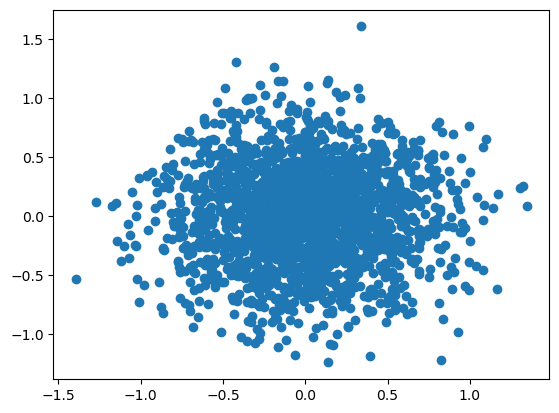

In [74]:
import numpy as np
import matplotlib.pyplot as plt

coords = pcoa_res.samples
df_pcoa = coords[['PC1','PC2']]
plt.scatter(df_pcoa['PC1'],df_pcoa['PC2'])

In [148]:
def generate_groups(n,dims):
    """
    Esto simula 3 grupos distintos números
    Para luego simular calcular distancia entre árboles 
    """
    centers = [
        [0 for _ in range(dims)],  
        [5 if x % 2 == 0 else 0 for x in range(dims)],  
        [5 if x % 2 != 0 else 0 for x in range(dims)]  
    ]
    data = np.zeros(shape=(3*n,dims))
    for i,center in enumerate(centers):
        cluster = np.random.normal(loc=center, scale=2.0, size=(n, dims)) 
        data[i * n:(i + 1) * n, :] = cluster
    return data

In [149]:
m = generate_groups(100,100) #Simula una matriz 
m

array([[-1.93860043,  4.59837998,  2.09082488, ..., -1.2568243 ,
         2.04387282,  0.64097781],
       [-1.82423885, -1.69432018, -1.52434591, ..., -2.04535701,
        -2.18311506,  0.93105501],
       [ 2.01451219,  0.28374822, -2.13985262, ...,  5.19292005,
        -0.82739446,  0.92039853],
       ...,
       [-0.60561277,  6.76200119, -1.92179646, ...,  3.91670194,
         3.45388817,  5.40598071],
       [ 1.13448591,  6.65247903, -0.82879774, ...,  3.04335111,
        -0.75945226, -1.17534318],
       [-1.24357793,  6.31777545,  0.59486172, ...,  6.27086254,
        -0.87046489,  6.2584612 ]])

In [150]:
from sklearn.metrics import pairwise_distances
from skbio.stats.distance import DistanceMatrix

distance_matrix = pairwise_distances(m, metric='euclidean') #En esta matriz se almacena la distancia entre árboles
distance_matrix = (distance_matrix + distance_matrix.T) / 2
distance_matrix

array([[ 0.        , 29.75648663, 26.03807433, ..., 44.38658311,
        46.01860343, 48.09405994],
       [29.75648663,  0.        , 29.52745051, ..., 47.60674767,
        47.83344219, 49.76722098],
       [26.03807433, 29.52745051,  0.        , ..., 42.31888436,
        45.57153309, 46.47891983],
       ...,
       [44.38658311, 47.60674767, 42.31888436, ...,  0.        ,
        30.15257037, 29.13351005],
       [46.01860343, 47.83344219, 45.57153309, ..., 30.15257037,
         0.        , 31.94282042],
       [48.09405994, 49.76722098, 46.47891983, ..., 29.13351005,
        31.94282042,  0.        ]])

In [151]:
pcoa_res = pcoa(distance_matrix,number_of_dimensions=2)

In [152]:
pcoa_res.samples #Tree space (2D)

,PC1,PC2
0,0.933892,-17.072645
1,3.282428,-15.369074
2,-2.221295,-17.092340
3,-0.312632,-15.172805
4,0.081616,-15.773708
...,...,...
295,-25.713231,8.284741
296,-22.543422,6.051257
297,-27.137388,5.381232
298,-23.209366,11.637812


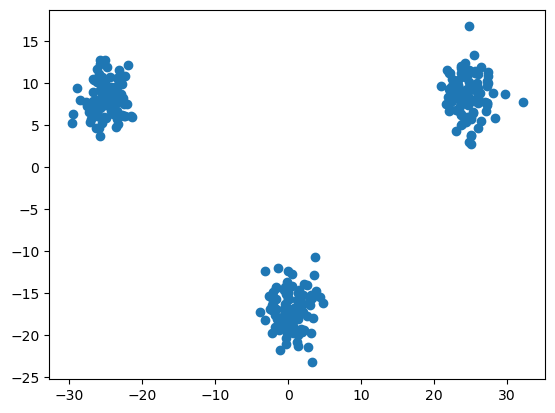

In [153]:
plt.scatter(pcoa_res.samples['PC1'],pcoa_res.samples['PC2'])